In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [21]:
full_data = pd.read_csv('C:/Users/ebour/Documents/()_Ironhack DA Bootcamp/()_Labs/6_5_lab-api-wrappers/full_data.csv')

In [22]:
full_data

,Unnamed: 0,track_name,artist_name,track_uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,spotify:track:6N1K5OVVCopBjGViHs2IvP,0.528,0.309,-7.398,0.0329,0.9240,0.000002,0.2820,0.307,133.830,4
1,1,The Joker And The Queen (feat. Taylor Swift),Taylor Swift,spotify:track:6N1K5OVVCopBjGViHs2IvP,0.528,0.309,-7.398,0.0329,0.9240,0.000002,0.2820,0.307,133.830,4
2,2,Zo Zijn,sor,spotify:track:1q30hUyUUZyjytlKTJz4cI,0.411,0.507,-9.190,0.3360,0.6400,0.000000,0.1480,0.291,80.120,4
3,3,Options (feat. 24kGoldn),Internet Money,spotify:track:6bhgpD7OkCATudfKJ50JB6,0.768,0.781,-5.873,0.1540,0.1020,0.000000,0.0840,0.795,163.984,5
4,4,Options (feat. 24kGoldn),24kGoldn,spotify:track:6bhgpD7OkCATudfKJ50JB6,0.768,0.781,-5.873,0.1540,0.1020,0.000000,0.0840,0.795,163.984,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,78,Pass The Peas,The J.B.'s,spotify:track:7CjV22bm1Vx0guKm2HV3OD,0.561,0.311,-14.981,0.2650,0.2600,0.000237,0.3530,0.702,195.996,4
4401,79,Luscious Lady,Darondo,spotify:track:23LN1l3UQ4Qjg3YPzN8Yi7,0.698,0.669,-7.318,0.0445,0.0681,0.007890,0.0975,0.864,100.300,4
4402,80,Bustin' Out (On Funk),Rick James,spotify:track:0wYo8gcZCREyPoWOv0FzCX,0.726,0.698,-9.761,0.1090,0.1810,0.000001,0.2270,0.882,102.955,4
4403,81,Hyperbolicsyllablecsesquedalymistic - Album - ...,Isaac Hayes,spotify:track:1ZV8wsmSwudU1LmwpkoWxD,0.571,0.643,-7.243,0.0365,0.0315,0.030400,0.1100,0.662,178.341,4


In [23]:
X = full_data.drop(['Unnamed: 0', 'track_name', 'artist_name', 'track_uri'], axis=1)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.528,0.309,-7.398,0.0329,0.9240,0.000002,0.2820,0.307,133.830,4
1,0.528,0.309,-7.398,0.0329,0.9240,0.000002,0.2820,0.307,133.830,4
2,0.411,0.507,-9.190,0.3360,0.6400,0.000000,0.1480,0.291,80.120,4
3,0.768,0.781,-5.873,0.1540,0.1020,0.000000,0.0840,0.795,163.984,5
4,0.768,0.781,-5.873,0.1540,0.1020,0.000000,0.0840,0.795,163.984,5
...,...,...,...,...,...,...,...,...,...,...
4400,0.561,0.311,-14.981,0.2650,0.2600,0.000237,0.3530,0.702,195.996,4
4401,0.698,0.669,-7.318,0.0445,0.0681,0.007890,0.0975,0.864,100.300,4
4402,0.726,0.698,-9.761,0.1090,0.1810,0.000001,0.2270,0.882,102.955,4
4403,0.571,0.643,-7.243,0.0365,0.0315,0.030400,0.1100,0.662,178.341,4


In [24]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# KMEANS

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [26]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2710
1    1352
2     343
dtype: int64

### Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

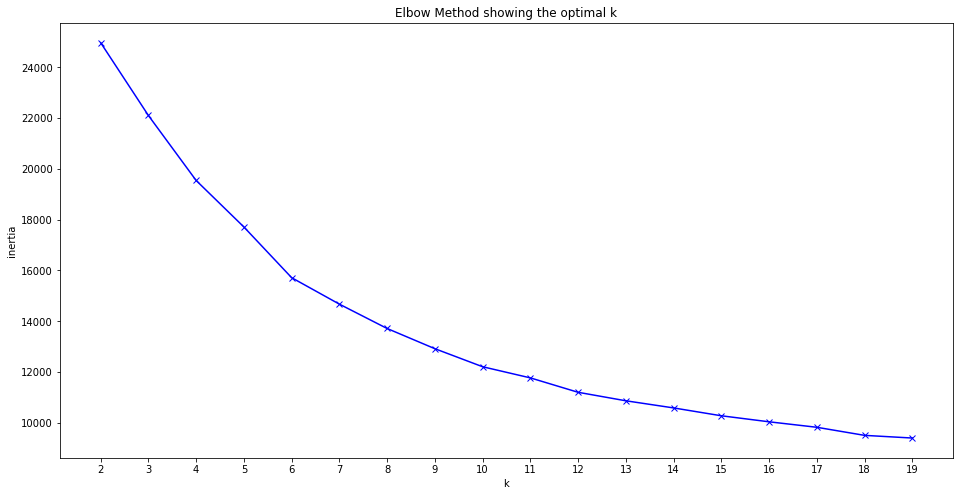

In [27]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

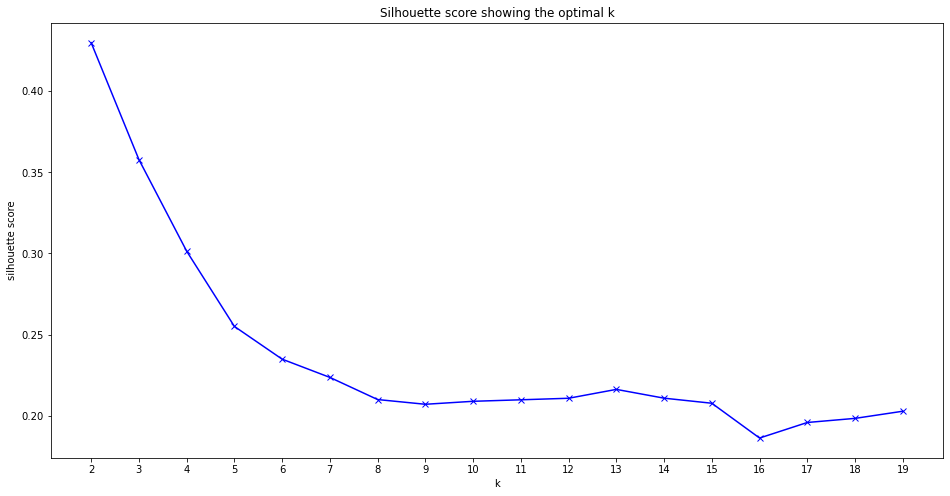

In [28]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

With such an evolution of the silhouette score It is difficult to find the best compromise between silhouette and inertia.
I would say the best compromis is probably k=4 even if the elbow is not that significant for the inertia.

# Agglomerative Clustering

### Linkage Single

In [35]:
single = cluster.AgglomerativeClustering(n_clusters=4, linkage='single')
clusters_agg_single = single.fit_predict(X_prep)

In [36]:
pd.Series(clusters_agg_single).value_counts().sort_index()

0    4323
1       2
2      79
3       1
dtype: int64

### Linkage Ward

In [37]:
ward = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_agg_ward = ward.fit_predict(X_prep)
pd.Series(clusters_agg_ward).value_counts().sort_index()

0    1301
1    2432
2     155
3     517
dtype: int64

In [38]:
ward = cluster.AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_agg_ward = ward.fit_predict(X_prep)
pd.Series(clusters_agg_ward).value_counts().sort_index()

0    2432
1    1221
2     155
3     517
4      80
dtype: int64

In [39]:
ward = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
clusters_agg_ward = ward.fit_predict(X_prep)
pd.Series(clusters_agg_ward).value_counts().sort_index()

0    1027
1     517
2     494
3     490
4      80
5     155
6     624
7     530
8     237
9     251
dtype: int64